In [17]:
from src.solvers.DLHeu import DLHeu
import pandas as pd

deepl = DLHeu()

In [16]:

training_data = deepl.create_training_data()
training_data.to_csv("train.csv")




Solving 0
Solving 1
Solving 2
Solving 3
Solving 4
Solving 5
Solving 6
Solving 7
Solving 8
Solving 9
Solving 10
Solving 11


KeyboardInterrupt: 

epoch,train_loss,valid_loss,accuracy,time
0,0.285624,0.241024,0.891000,00:00
1,0.288184,0.219972,0.902500,00:00
2,0.277676,0.228346,0.904000,00:00
3,0.274202,0.238347,0.890000,00:00
4,0.279605,0.246764,0.896000,00:00
5,0.273593,0.229586,0.894000,00:00
6,0.266787,0.232100,0.895500,00:00
7,0.269545,0.223790,0.904000,00:00
8,0.263796,0.239332,0.893500,00:00
9,0.281047,0.225630,0.904000,00:00


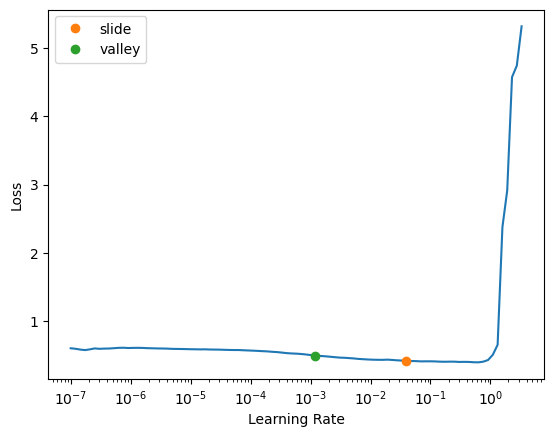

In [18]:
training_data = pd.read_csv("train.csv")
deepl.training_data = training_data
deepl.train(deepl.training_data)

In [19]:
training_data.describe()

,Unnamed: 0,p_syn,profit,l_cost,u_cost,is_in_opt_sol
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.500000,0.857884,0.082021,0.029800,0.047489,0.505100
std,28.867513,0.066867,0.032107,0.019047,0.031520,0.499999
min,0.000000,0.600000,0.027155,0.000806,0.001048,-0.000000
25%,24.750000,0.810000,0.057725,0.014294,0.022421,0.000000
50%,49.500000,0.860000,0.075162,0.027488,0.042770,1.000000
75%,74.250000,0.900000,0.103297,0.042208,0.067044,1.000000
max,99.000000,1.110000,0.193335,0.095271,0.178659,1.000000


epoch,train_loss,valid_loss,accuracy,time
0,0.280566,0.239514,0.892000,00:00
1,0.274455,0.279256,0.861500,00:00
2,0.286385,0.229961,0.897000,00:00
3,0.280334,0.251114,0.883000,00:00
4,0.284791,0.226471,0.903000,00:00
5,0.282192,0.235464,0.893500,00:00
6,0.269938,0.243749,0.906000,00:00
7,0.272990,0.229214,0.900000,00:00
8,0.275804,0.225054,0.903500,00:00
9,0.270263,0.239377,0.905500,00:00


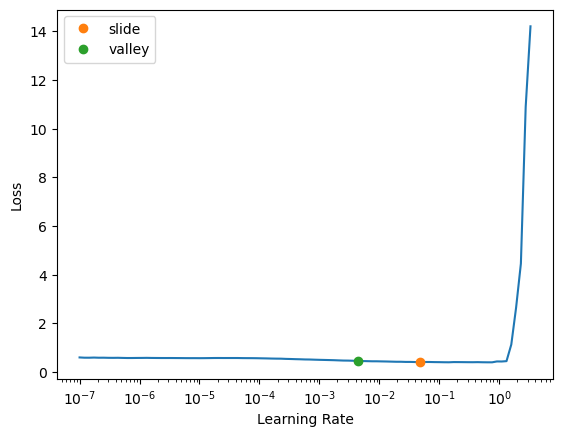

In [20]:
from src.data_structures.Instance import Instance
from src.solvers.collection import SolverCollection,SolverConfig
instance = Instance.from_file("/home/mixto/repositories/newPRKP/data/S_900_497_7733.985.json")
learner = deepl.train(training_data)



In [21]:
instance = Instance.from_file("/home/mixto/repositories/newPRKP/data/S_900_497_7733.985.json")
instance = Instance.generate(5000,10)
features = deepl.features(instance)
features_pd = pd.DataFrame(features,columns=["p_syn","profit","l_cost","u_cost"])
preds_dl = learner.dls.test_dl(features_pd)


In [22]:

preds,expected = learner.get_preds(dl=preds_dl,reorder=True)




In [23]:
from src.solvers.MLHeu.functions_ml import fix_variables
variables_to_fix = fix_variables(instance.n_items,preds,0.85)


In [24]:
variables_to_fix


array([-1., -1., -1., ..., -1., -1., -1.])

In [25]:
from src.solvers.collection import VAR_TYPE        
discrete_config = SolverConfig(VAR_TYPE.BINARY,True,variables_to_fix)
final_solution  = SolverCollection.gurobi(instance,discrete_config)

In [26]:
print(final_solution)

Sol(of:194713.4785545927,time:10.262323379516602)


In [27]:
from src.data_structures.Instance import Instance
from src.solvers.collection import SolverCollection,SolverConfig



print(SolverCollection.DL(deepl,instance))
print(SolverCollection.baldo_ML(instance))
print(SolverCollection.baldo_GA(instance))
print(SolverCollection.gurobi(instance,solver_config=SolverConfig.optimal()))



Sol(of:194713.4785545927,time:11.761369466781616)
Sol(of:194412.5868729963,time:9.402341604232788)


In [ ]:
print(SolverCollection.gurobi(instance,solver_config=SolverConfig.continous()))